# Chapter 5 Coastal Engineering: Wave Prediction

1. [Introduction: Wave Prediction](#1.-Introduction)
2. [Simulation: Wave Prediction](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment) 

## 1. Introduction


### Wind Wave Height Estimator

This Jupyter Notebook provides a comparative visualization of estimated **significant wave heights** using multiple empirical models based on wind conditions. It empowers learners to explore how wind speed, fetch length, and wind duration influence the formation of surface gravity waves in open water bodies.

---

##### 💡 Purpose

The simulation helps answer questions like:

- How do different empirical formulas estimate wave height?
- How do wind fetch and duration influence wave growth?
- How do rapid changes in wind speed affect offshore conditions?

---

##### Models Implemented

The following empirical formulas are used to estimate wave height \( H \):

- **Simple Empirical**:  
  $$
  H = 0.025 \cdot V^2
  $$
  A basic quadratic fit for quick estimation.

- **Duration Limited**:  
  $$
  H = 0.0146 \cdot D^{5/7} \cdot V^{9/7}
  $$
  Appropriate when wave growth is constrained by how long the wind blows.

- **Fetch Limited**:  
  $$
  H = 0.0163 \cdot \sqrt{F / 1000} \cdot V
  $$
  Models cases where the fetch is the limiting factor for wave development.

- **NOAA Rule of Thumb**:  
  $$
  H = 0.3 \cdot V
  $$
  A quick linear approximation often used in engineering estimates.

> 🔍 *Units:*  
> \( V \) = Wind speed (m/s),  
> \( F \) = Fetch length (m),  
> \( D \) = Wind duration (hr)
---
##### 🎛 Interactive Controls
Use the sliders below to adjust:
- **Wind Speed** (5–50 m/s)  
- **Fetch Length** (1,000–500,000 m)  
- **Wind Duration** (1–24 hours)
Each setting dynamically updates the chart, helping you compare how wave height predictions vary by method.
---
##### 📊 Output Visualization

The bar chart shows estimated wave heights (in meters) from each model for the selected wind conditions. Values are labeled above each bar to enhance clarity and comparison.




## 2. Simulation

### 🌬️ Wind-Driven Wave Height Estimator — Empirical Comparison Tool

---

### 🧠 What It Is

An interactive Python widget tool to estimate and compare **wind-generated wave heights** using multiple simplified empirical formulas based on wind speed, fetch length, and storm duration.

---

### ⚙️ How It Works

- Defines wave height estimation methods:
  - **Simple empirical**: proportional to \( V^2 \)
  - **Duration-limited**: includes time-limited growth
  - **Fetch-limited**: includes distance over which wind acts
  - **NOAA rule of thumb**: quick linear scale of wave height
- Allows user to adjust wind speed (`V`), fetch (`F`), and duration (`D`)
- Computes height estimates and displays comparison bar chart

---

### 🎛️ Inputs

| Parameter           | Meaning                                      |
|---------------------|----------------------------------------------|
| `V` (m/s)           | Wind speed                                   |
| `F` (m)             | Fetch distance — length of water exposed to wind |
| `D` (hr)            | Duration of wind blowing                     |

---

### 📊 Outputs

- 📈 Bar chart showing wave height estimates (in meters) by method
- 🔢 Value annotations above each bar for clarity
- Chart title summarizes input values used for comparison

---

### 🧭 How to Interpret

- **Higher wind speeds** → consistently higher wave heights
- **Fetch-limited vs duration-limited**: shows whether spatial or temporal constraints dominate
- Helps understand method sensitivity and idealized estimates
- Useful for rapid planning, initial design screening, and educational purposes

> _This tool makes empirical wave theory accessible and visually comparable — helpful for coastal engineers, planners, and students._


## 3. Simulation

### 🌬️ Wind-Generated Wave Height Estimator — Empirical Comparison Tool

---

### 🧠 What It Is

An interactive visualization tool that compares multiple empirical formulas for estimating **wind-driven wave height** based on:
- Wind speed (`V`)
- Fetch distance (`F`)
- Storm duration (`D`)

---

### ⚙️ How It Works

- Implements simple mathematical formulas to estimate wave height using different assumptions:
  - **Simple empirical**: basic velocity-based relation
  - **Duration-limited**: depends on how long the wind blows
  - **Fetch-limited**: depends on horizontal water exposure
  - **NOAA estimate**: rule-of-thumb formula

- Uses `ipywidgets` to create sliders for input control  
- Plots results in a comparison bar chart using `matplotlib`

---

### 🎛️ Inputs

| Parameter        | Meaning                              |
|------------------|--------------------------------------|
| `Wind Speed (V)` | Speed of wind (m/s)                  |
| `Fetch (F)`      | Distance over which wind acts (m)    |
| `Duration (D)`   | Length of time wind blows (hours)    |

---

### 📊 Outputs

- **Bar chart** comparing wave height estimates (in meters) across methods
- **Value labels** above each bar for quick readability
- **Chart title** displays current input values for context

---

### 🧭 How to Interpret

- **Wave height increases** with wind speed and fetch
- Different methods may yield significantly different estimates depending on input conditions
- Helps highlight the sensitivity of wave growth to time and distance
- Useful for preliminary wave modeling, design screening, and student exploration

> _This tool offers a clear, adjustable view of how waves grow under wind—across simplified empirical approaches._


## 4 Simulation

### USACE Wave Prediction Tool (CEM Dimensional Analysis)

This notebook provides an interactive tool to estimate **significant wave height (Hs)** and **peak wave period (Tp)** using fetch- and duration-limited empirical formulas derived from the **U.S. Army Corps of Engineers Coastal Engineering Manual (CEM)**.

---

##### Objective

To calculate and visualize wave height development under different wind conditions by considering:

- **Wind speed (V)** at 10 meters elevation
- **Fetch length (F)** — the uninterrupted distance over which wind blows
- **Wind duration (t)** — the time wind has been blowing at a constant speed and direction

---

####  Theoretical Framework

The predictions are based on **non-dimensional empirical relationships** fitted to observed data from the Shore Protection Manual (SPM), expressed as:

- **Non-dimensional fetch**:  
  $$
  \hat{X} = \frac{g \cdot F}{V^2}
  $$

- **Non-dimensional duration**:  
  $$
  \hat{T} = \frac{g \cdot t}{V}
  $$

The empirical formulas for **non-dimensional wave height ($( \hat{H} $))** and **non-dimensional period ($( \hat{T}_p $))** are:

```python
Ĥ = 0.283 * tanh(0.0125 * X̂)
T̂p = 1.2 * tanh(0.077 * X̂**0.25)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

g = 9.81  # gravitational acceleration (m/s²)
def nondim_wave_height_fetch(X_hat):
    return 0.283 * np.tanh(0.0125 * X_hat)

def nondim_wave_period_fetch(X_hat):
    return 1.2 * np.tanh(0.077 * X_hat**0.25)

def nondim_wave_height_duration(T_hat):
    return 0.283 * np.tanh(0.0125 * T_hat)

def nondim_wave_period_duration(T_hat):
    return 1.2 * np.tanh(0.077 * T_hat**0.25)

# Constants
g = 9.81  # gravitational acceleration
A = 0.283
B = 0.0125

def fetch_limited_wave(V, F):
    X_hat = g * F / V**2
    H_hat = nondim_wave_height_fetch(X_hat)
    T_hat = nondim_wave_period_fetch(X_hat)
    Hs = H_hat * V**2 / g
    Tp = T_hat * V / g
    return Hs, Tp

def duration_limited_wave(V, t):
    T_hat = g * t / V
    H_hat = nondim_wave_height_duration(T_hat)
    T_hat_val = nondim_wave_period_duration(T_hat)
    Hs = H_hat * V**2 / g
    Tp = T_hat_val * V / g
    return Hs, Tp

def fetch_limited_wave_heightspm(V, F):
    """Fetch-limited wave height (SPM)"""
    gF_V2 = g * F / V**2
    return A * np.tanh(B * gF_V2) * V**2 / g

def duration_limited_wave_heightspm(V, t):
    """Duration-limited wave height (SPM)"""
    gt_V = g * t / V
    return A * np.tanh(B * gt_V) * V**2 / g

def plot_usace_wave(V=15, F_km=50, t_hr=3):
    F = F_km * 1000  # km → m
    t = t_hr * 3600  # hr → s
    Hf, Tf = fetch_limited_wave(V, F)
    Hd, Td = duration_limited_wave(V, t)
    Hs = min(Hf, Hd)
    Tp = Tf if Hf < Hd else Td
    print(f"🌬️ Wind Speed: {V:.1f} m/s")
    print(f"🌊 Fetch-Limited Hs: {Hf:.2f} m, Tp: {Tf:.2f} s")
    print(f"⏱️ Duration-Limited Hs: {Hd:.2f} m, Tp: {Td:.2f} s")
    print(f"✅ Selected Hs: {Hs:.2f} m, Tp: {Tp:.2f} s")
    # Plotting
    fetch_range = np.linspace(1, 200, 300)
    Hs_fetch = [fetch_limited_wave(V, f * 1000)[0] for f in fetch_range]
    plt.figure(figsize=(10, 5))
    plt.plot(fetch_range, Hs_fetch, label="Fetch-Limited Hs", color='navy')
    plt.axhline(Hd, color='orange', linestyle='--', label=f'Duration-Limited Hs = {Hd:.2f} m')
    plt.axhline(Hs, color='green', linestyle='-.', label=f'Selected Hs = {Hs:.2f} m')
    plt.xlabel("Fetch (km)")
    plt.ylabel("Significant Wave Height Hs (m)")
    plt.title("USACE Wave Height Prediction (CEM Dimensional Analysis)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
    spm_FetchlimitedHs=fetch_limited_wave_heightspm(V, F)
    spm_DurationlimitedHs=duration_limited_wave_heightspm(V, F)
    
    print("spm_FetchlimitedHs=",spm_FetchlimitedHs)
    print("spm_DurationlimitedHs=",spm_DurationlimitedHs)
interact(
    plot_usace_wave,
    V=FloatSlider(value=15, min=5, max=100, step=1, description="Wind Speed (m/s)"),
    F_km=FloatSlider(value=50, min=1, max=200, step=1, description="Fetch (km)"),
    t_hr=IntSlider(value=3, min=0, max=24, step=1, description="Duration (hr)")
)   

interactive(children=(FloatSlider(value=15.0, description='Wind Speed (m/s)', min=5.0, step=1.0), FloatSlider(…

<function __main__.plot_usace_wave(V=15, F_km=50, t_hr=3)>

## 5 Simulation

#### Interactive Wave Spectrum Comparison: PM vs JONSWAP

This Jupyter Notebook demonstrates the fundamental differences between the **Pierson–Moskowitz (PM)** and **JONSWAP** wave spectra—two widely used models to describe the energy distribution of sea surface waves generated by wind.

---

##### Learning Objectives

- Understand the theoretical foundations of the PM and JONSWAP spectra
- Explore how wave energy is distributed over frequency for varying wind speeds
- Examine the effect of spectral peakedness through the JONSWAP γ (gamma) parameter
- Interpret real-time spectral plots using interactive sliders

---

##### Theoretical Background

##### Pierson–Moskowitz (PM) Spectrum

The PM spectrum models a **fully developed sea** where waves have grown under consistent wind over time and space. It assumes the sea is in equilibrium and is controlled primarily by wind speed \( U_{10} \) at 10 meters above the surface.

The spectral shape is defined by:

$$
S_{PM}(f) = \alpha \frac{g^2}{(2\pi)^4} f^{-5} \exp\left[-1.25 \left( \frac{f_p}{f} \right)^4 \right]
$$

---

##### 🌐 JONSWAP Spectrum

The **JONSWAP spectrum** extends PM by introducing a **peak enhancement factor \( \gamma \)** to account for young, developing seas. It narrows the spectral peak and adds asymmetry to the distribution. 

The expression is:

$$
S_{JONSWAP}(f) = S_{PM}(f) \cdot \gamma^{\exp \left[ - \frac{(f - f_p)^2}{2 \sigma^2 f_p^2} \right]}
$$

Where:
- \( f_p \): peak frequency, inversely related to wind speed
- \( \gamma \): spectral peakedness (default ≈ 3.3)
- \( \sigma \): frequency-dependent bandwidth (0.07 if \( f < f_p \), else 0.09)

---

##### Interactive Controls

Use the sliders below to change:

- **Wind speed \( U_{10} \)** (in m/s): influences peak frequency and total energy
- **Gamma (γ)**: controls the sharpness and intensity of the JONSWAP peak

The simulation will regenerate and plot:

- The **PM spectrum** (solid line)
- The **JONSWAP spectrum** (dashed line)

All curves are plotted against frequency in Hz with spectral energy density in m²/Hz.

---

##### Output Interpretation

- **Higher wind speeds** shift the peak to lower frequencies (longer waves)
- **Larger γ values** sharpen the JONSWAP spectrum, representing more "peaky" wave energy
- The **difference between spectra** highlights stages of sea development (from growing to fully developed)

---
💡 Use this tool to explore real-world sea state dynamics, inform spectral wave modeling, or just to build intuition about wave growth under varying wind conditions.

In [3]:
# 🔹 Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, FloatRangeSlider
import warnings
warnings.filterwarnings('ignore')
# 🔹 Cell 2: Spectrum Functions
g = 9.81
alpha = 0.0081
sigma_low = 0.07
sigma_high = 0.09

# Pierson–Moskowitz Spectrum
def pm_spectrum(f, U10):
    fp = g / (2 * np.pi * 0.83 * U10)
    return (alpha * g**2 / (2 * np.pi)**4) * f**(-5) * np.exp(-1.25 * (fp / f)**4)

# JONSWAP Spectrum
def jonswap_spectrum(f, U10, gamma):
    fp = g / (2 * np.pi * 0.83 * U10)
    S_pm = pm_spectrum(f, U10)
    sigma = np.where(f <= fp, sigma_low, sigma_high)
    exponent = -((f - fp)**2) / (2 * sigma**2 * fp**2)
    peak_enhancement = gamma ** np.exp(exponent)
    return S_pm * peak_enhancement
# 🔹 Cell 3: Plot and Calculate Hs from Both Spectra
def plot_and_estimate(U10=15.0, gamma=3.3, freq_range=(0.05, 1.5)):
    f_min, f_max = freq_range
    f = np.linspace(f_min, f_max, 500)

    # Compute spectra
    S_pm = pm_spectrum(f, U10)
    S_jonswap = jonswap_spectrum(f, U10, gamma)

    # Integrate spectra to get Hs
    m0_pm = np.trapz(S_pm, f)
    Hs_pm = 4 * np.sqrt(m0_pm)

    m0_js = np.trapz(S_jonswap, f)
    Hs_js = 4 * np.sqrt(m0_js)

    # Plot spectra
    plt.figure(figsize=(10, 6))
    plt.plot(f, S_pm, label=f"PM Spectrum (Hs = {Hs_pm:.2f} m)", linewidth=2)
    plt.plot(f, S_jonswap, '--', label=f"JONSWAP Spectrum (γ = {gamma:.1f}, Hs = {Hs_js:.2f} m)", linewidth=2)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Spectral Energy Density $S(f)$ (m²/Hz)")
    plt.title(f"Wave Spectra Comparison at U10 = {U10:.1f} m/s")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 🔹 Cell 4: Interactive Sliders
interact(
    plot_and_estimate,
    U10=FloatSlider(value=15, min=5, max=30, step=1, description="Wind Speed (m/s)"),
    gamma=FloatSlider(value=3.3, min=1.0, max=7.0, step=0.1, description="Gamma (γ)"),
    freq_range=FloatRangeSlider(value=(0.05, 1.5), min=0.01, max=2.0, step=0.01, description="Freq Range (Hz)")
)

interactive(children=(FloatSlider(value=15.0, description='Wind Speed (m/s)', max=30.0, min=5.0, step=1.0), Fl…

<function __main__.plot_and_estimate(U10=15.0, gamma=3.3, freq_range=(0.05, 1.5))>

In [4]:
#Defining the Spectrum based on observation data and then estimating the significante wave height

## 6 Simulation 

### Interactive Estimation of Wave Spectra and Significant Wave Height (Hs)

This notebook compares two fundamental ocean wave spectral models—**Pierson–Moskowitz (PM)** and **JONSWAP**—to investigate how wind speed, frequency range, and spectral peakedness affect wave energy distributions and significant wave height estimations.

--
##### Purpose
Explore how:
- Wind speed at 10 meters height (\(U_{10}\))
- JONSWAP peak enhancement factor (\( \gamma \))
- Frequency range of interest
influence wave spectra shape and total wave energy.
---
##### Models Implemented
- **PM Spectrum**: Represents a fully developed sea state assuming equilibrium under steady wind.
  $$
  S_{PM}(f) = \alpha \cdot \frac{g^2}{(2\pi)^4} f^{-5} \exp\left[-1.25 \left( \frac{f_p}{f} \right)^4 \right]
  $$

- **JONSWAP Spectrum**: Enhances the PM spectrum to represent growing seas using a peakedness factor \( \gamma \).

  $$
  S_{JONSWAP}(f) = S_{PM}(f) \cdot \gamma^{\exp \left( - \frac{(f - f_p)^2}{2 \sigma^2 f_p^2} \right)}
  $$
---
##### Interactive Inputs
Use the sliders to control:
- **Wind Speed (m/s)**: Adjusts the peak frequency and energy content
- **Gamma (γ)**: Defines the sharpness of the spectral peak (JONSWAP only)
- **Frequency Range (Hz)**: Allows you to focus on a specific slice of the spectrum
---
##### Outputs
- A line plot comparing the PM and JONSWAP spectra across frequencies
- Real-time calculation and display of:
  - **$( H_s $)** from PM spectrum: $( H_s = 4 \sqrt{m_0} $)
  - **$( H_s $)** from JONSWAP spectrum
The area under each curve is numerically integrated to yield the zeroth moment \( m_0 \), which is then used to estimate the significant wave height.
---
📘 *Insight*: A higher gamma value leads to a narrower, more peaked spectrum—often representing developing wind seas. The PM spectrum is smoother and broader, idealized for fully developed conditions.


                     WVHT  DPD
timestamp                     
2025-07-21 22:50:00   1.5  7.0
2025-07-21 22:20:00   1.3  7.0
2025-07-21 21:50:00   1.4  7.0
2025-07-21 21:20:00   1.4  7.0
2025-07-21 20:50:00   1.4  7.0
Observed Hs: 1.50 m, Tp: 7.00 s
Estimated from NOAA data:
  Hs = 1.50 m
  Tp = 7.00 s
  fp = 0.143 Hz
  Estimated U10 (PM) = 13.17 m/s


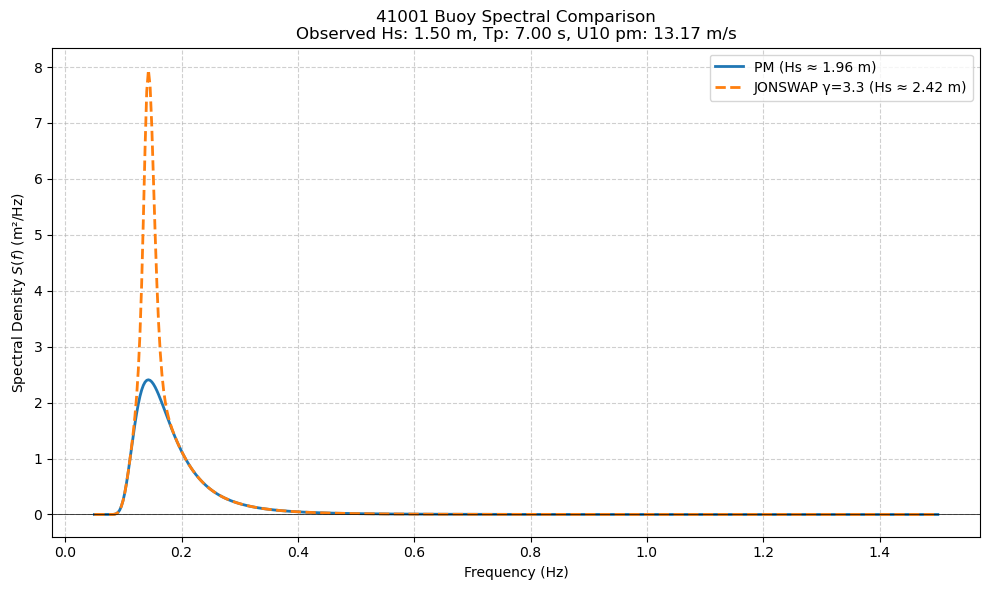

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

alpha = 0.0081
sigma_low = 0.07
sigma_high = 0.09

# Example: Station 41001 (East of Cape Hatteras)
station_id = '41001'
url = f'https://www.ndbc.noaa.gov/data/realtime2/{station_id}.txt'

# Read the data, skipping header rows
df = pd.read_csv(url, delim_whitespace=True, skiprows=[1], na_values='MM')

# Rename columns for clarity
df.columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
              'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY','TIDE'][:len(df.columns)]

df.rename(columns={'YY': 'year', 'MM': 'month', 'DD': 'day', 'hh':'hour', 'mm':'minute'}, inplace=True)
# Combine date columns into a timestamp
#df['timestamp'] = pd.to_datetime(df[['YY', 'MM', 'DD', 'hh', 'mm']])
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.set_index('timestamp', inplace=True)

# Preview wave height and dominant period
print(df[['WVHT', 'DPD']].dropna().head())
# Use most recent record
latest = df[['WVHT', 'DPD']].dropna().iloc[0]
Hs_obs = latest['WVHT']
Tp_obs = latest['DPD']
print(f"Observed Hs: {Hs_obs:.2f} m, Tp: {Tp_obs:.2f} s")

def pm_spectrum(f, U10):
    fp = g / (2 * np.pi * 0.83 * U10)
    return (alpha * g**2 / (2 * np.pi)**4) * f**-5 * np.exp(-1.25 * (fp / f)**4)

def jonswap_spectrum(f, U10, gamma=3.3):
    S_pm = pm_spectrum(f, U10)
    fp = g / (2 * np.pi * 0.83 * U10)
    sigma = np.where(f <= fp, sigma_low, sigma_high)
    enhancement = gamma ** np.exp(-((f - fp)**2) / (2 * sigma**2 * fp**2))
    return S_pm * enhancement

# Estimate wind speed from PM inverse formula
g = 9.81
U10_pm = (Tp_obs * g) / (2 * np.pi * 0.83)

# Estimate peak frequency
fp = 1 / Tp_obs

# Print estimated parameters
print(f"Estimated from NOAA data:")
print(f"  Hs = {Hs_obs:.2f} m")
print(f"  Tp = {Tp_obs:.2f} s")
print(f"  fp = {fp:.3f} Hz")
print(f"  Estimated U10 (PM) = {U10_pm:.2f} m/s")

# Frequency range
f = np.linspace(0.05, 1.5, 500)
# Compute spectra
S_pm = pm_spectrum(f, U10_pm)
S_jonswap = jonswap_spectrum(f, U10_pm, gamma=3.3)
# Integrate to get Hs from spectra
m0_pm = np.trapz(S_pm, f)
m0_js = np.trapz(S_jonswap, f)
Hs_pm = 4 * np.sqrt(m0_pm)
Hs_js = 4 * np.sqrt(m0_js)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(f, S_pm, label=f"PM (Hs ≈ {Hs_pm:.2f} m)", lw=2)
plt.plot(f, S_jonswap, '--', label=f"JONSWAP γ=3.3 (Hs ≈ {Hs_js:.2f} m)", lw=2)
plt.axhline(0, color='black', lw=0.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Density $S(f)$ (m²/Hz)")
plt.title(f"{station_id} Buoy Spectral Comparison\nObserved Hs: {Hs_obs:.2f} m, Tp: {Tp_obs:.2f} s, U10 pm: {U10_pm:.2f} m/s")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 7. Self-Assessment

## 🌊 Wave Spectrum Simulation — Quiz Questions

---

### 🧠 Quiz 1: Gravitational Acceleration
**Question:** What is the value of gravitational acceleration \\( g \\) used in the spectrum functions?  
- [ ] 8.91 m/s²  
- [ ] 10.0 m/s²  
- [x] 9.81 m/s²  
- [ ] 9.8 m/s²  

---

### 🧠 Quiz 2: Purpose of PM Spectrum
**Question:** What is the purpose of the Pierson–Moskowitz (PM) spectrum function?  
- [x] To model wave spectra for fully developed seas  
- [ ] To calculate wind speed at different altitudes  
- [ ] To simulate the effect of gamma on wave height  
- [ ] To determine the frequency range of ocean waves  

---

### 🧠 Quiz 3: Role of \\( \\alpha \\) in PM Spectrum
**Question:** In the PM spectrum formula, what does \\( \\alpha \\) represent?  
- [x] A constant related to wave energy  
- [ ] The gravitational acceleration  
- [ ] The wind speed at 10 meters above sea level  
- [ ] The frequency of ocean waves  

---

### 🧠 Quiz 4: Role of \\( \\sigma \\) in JONSWAP Spectrum
**Question:** What is the role of \\( \\sigma \\) in the JONSWAP spectrum?  
- [x] It determines the width of the frequency peak  
- [ ] It represents the gravitational acceleration  
- [ ] It scales the wave energy density  
- [ ] It defines the wind speed at 10 meters above sea level  

---

### 🧠 Quiz 5: Enhancement Factor \\( \\gamma \\)
**Question:** What is the enhancement factor \\( \\gamma \\) used for in the JONSWAP spectrum?  
- [x] To amplify the energy near the peak frequency  
- [ ] To calculate the gravitational acceleration  
- [ ] To determine the wind speed at 10 meters  
- [ ] To scale the frequency range  

---

### 🧠 Quiz 6: Significant Wave Height \\( H_s \\)
**Question:** How is the significant wave height \\( H_s \\) calculated from the wave spectrum?  
- [x] \\( H_s = 4 \\sqrt{m_0} \\)  
- [ ] \\( H_s = 2 \\sqrt{m_0} \\)  
- [ ] \\( H_s = m_0 / 4 \\)  
- [ ] \\( H_s = m_0 \\times 4 \\)  

---

### 🧠 Quiz 7: Zeroth Moment \\( m_0 \\)
**Question:** What does the zeroth moment \\( m_0 \\) of the wave spectrum represent?  
- [x] The total energy of the wave spectrum  
- [ ] The peak frequency of the wave spectrum  
- [ ] The width of the frequency peak  
- [ ] The enhancement factor of the wave spectrum  

---

### 🧠 Quiz 8: Default Wind Speed \\( U_{10} \\)
**Question:** What is the default value of wind speed \\( U_{10} \\) in the interactive plot?  
- [x] 15 m/s  
- [ ] 10 m/s  
- [ ] 20 m/s  
- [ ] 5 m/s  

---

### 🧠 Quiz 9: Purpose of `interact` Function
**Question:** What is the purpose of the `interact` function in the code?  
- [x] To create interactive sliders for user input  
- [ ] To calculate the wave spectrum  
- [ ] To plot the wave spectra  
- [ ] To integrate the wave spectrum  

---

---

### ❓ Question 1: Gravitational Acceleration
What is the value of gravitational acceleration \( g \) used in the code?

- [ ] 10.0 m/s²  
- [ ] 8.91 m/s²  
- [x] 9.81 m/s²  
- [ ] 9.8 m/s²  

---

### ❓ Question 2: Purpose of `nondim_wave_height_fetch(X_hat)`
What does the function `nondim_wave_height_fetch(X_hat)` calculate?

- [x] Non-dimensional wave height based on fetch  
- [ ] Non-dimensional wave period based on fetch  
- [ ] Dimensional wave height based on fetch  
- [ ] Dimensional wave period based on fetch  

---

### ❓ Question 3: Formula for \( X_{\hat} \)
What is the formula used to calculate \( X_{\hat} \) in the fetch-limited wave function?

- [x] \( X_{\hat} = \frac{g \cdot F}{V^2} \)  
- [ ] \( X_{\hat} = \frac{F}{g \cdot V^2} \)  
- [ ] \( X_{\hat} = \frac{V^2}{g \cdot F} \)  
- [ ] \( X_{\hat} = \frac{g \cdot V^2}{F} \)  

---

### ❓ Question 4: Output of `duration_limited_wave(V, t)`
What does the function `duration_limited_wave(V, t)` return?

- [x] Significant wave height and wave period based on duration  
- [ ] Significant wave height and wave period based on fetch  
- [ ] Non-dimensional wave height and wave period based on duration  
- [ ] Non-dimensional wave height and wave period based on fetch  

---

### ❓ Question 5: Role of Constants A and B
What do the constants `A = 0.283` and `B = 0.0125` represent in the SPM formulas?

- [x] Empirical coefficients for wave height scaling  
- [ ] Wind speed and fetch conversion factors  
- [ ] Gravity and time scaling parameters  
- [ ] Plotting thresholds for wave height  

---

### ❓ Question 6: Purpose of `plot_usace_wave`
What is the purpose of the `plot_usace_wave` function?

- [x] To plot fetch-limited and duration-limited wave heights and select the final wave height  
- [ ] To calculate only fetch-limited wave height and period  
- [ ] To calculate only duration-limited wave height and period  
- [ ] To interactively adjust wind speed without plotting  

---

### ❓ Question 7: Units Conversion in `plot_usace_wave`
How are fetch and duration converted before calculations?

- [x] Fetch: km → m, Duration: hr → s  
- [ ] Fetch: m → km, Duration: s → hr  
- [ ] Fetch: km → s, Duration: hr → m  
- [ ] No conversion is applied  

---

### ❓ Question 8: Final Selection Logic
How is the final wave height \( H_s \) selected in the `plot_usace_wave` function?

- [x] The minimum of fetch-limited and duration-limited \( H_s \)  
- [ ] The maximum of fetch-limited and duration-limited \( H_s \)  
- [ ] The average of both \( H_s \) values  
- [ ] Always the fetch-limited \( H_s \)  

---

### ❓ Question 9: Interactive Controls
Which parameters are controlled by sliders in the interactive plot?

- [x] Wind speed, fetch (km), and duration (hr)  
- [ ] Wave height, wave period, and gravity  
- [ ] Fetch, duration, and plotting resolution  
- [ ] Only wind speed  

---

### ❓ Question 10: SPM Wave Height Functions
What do `fetch_limited_wave_heightspm` and `duration_limited_wave_heightspm` compute?

- [x] Dimensional wave height using SPM formulas  
- [ ] Non-dimensional wave period using SPM  
- [ ] Wind speed and fetch ratios  
- [ ] Interactive plot labels  

